# Import library

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [70]:
import warnings
warnings.filterwarnings('ignore')

# Basic Understanding of Data.

*   read data
* check basic data info

*   check basic statistics
*   check missing and dplicated data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/I gonna get Data science Job/Game/online_gaming_behavior_dataset.csv')

In [4]:
df.shape

(40034, 13)

In [5]:
df.head()

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium  
4                    37          Medium

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [7]:
df.describe()

PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000                  52.000000     25.000000   
50%           9.000000                  95.000000     49.000000   
75%          14.000000                 137.000000     74.000000   
max          19.000000                 179.000000     99.000000   

       AchievementsUnlocked  
count          40034.000000  
mean              24.526477  
std               14.430726  
min                0.000000  
25%               12.000000  
50%               25.000000  
75%               37.000000  
max               49.000000

In [8]:
df.InGamePurchases = df.InGamePurchases.astype('bool')

In [9]:
df.describe(include = ["bool","object"])

Gender Location GameGenre InGamePurchases GameDifficulty  \
count   40034    40034     40034           40034          40034   
unique      2        4         5               2              3   
top      Male      USA    Sports           False           Easy   
freq    23959    16000      8048           31993          20015   

       EngagementLevel  
count            40034  
unique               3  
top             Medium  
freq             19374

In [10]:
object_cols = df.select_dtypes(include=["bool","object"])

for col in object_cols.columns:
  print(col)
  print(df[col].value_counts(), "\n")

Gender
Gender
Male      23959
Female    16075
Name: count, dtype: int64 

Location
Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64 

GameGenre
GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64 

InGamePurchases
InGamePurchases
False    31993
True      8041
Name: count, dtype: int64 

GameDifficulty
GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64 

EngagementLevel
EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64 



In [11]:
df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

**Numerical Data:**


1.   age datas are  evenly spread out in each quatile .
2.   min age is 15 so my hypothesis are  1.player lied about thier age so they can purchase in game or play age restricted game 2.this data contain only age restricted game.
3.   age mean is 31 so most of players are adult.


4.   hour play are also evenly spread out  .
5.   mean is 12 ,this deosnt make sense for me because most of players are adult.
6. and 75% of playes spend atleast 6 hours per session


6.   in game purchase is bool not int,so i changed its data type.

7.   SessionsPerWeek mean is 9


8.   AvgSessionDurationMinutes	mean is 94 min. which is strange because the hour play (the definition of this col is hour play per session) mean is 12 hr.


*   the hour play is more likely to be per week not per session




9.   PlayerLevel	mean is 46 so most of players is in the middle game ,max is 99

10. achievements mean is 24 which max is 49 so it Aligns with the level  cuz most of players are in middle game














Category data:


1.   	Gender : most of players are male.

2.   Location : most of players are from USA.

3.   GameGenre:  most of the game in dataset are sport game which alighn with most of players are male . Each genre have equally observations.

4.   GameDifficulty: most of game difficulty is easy

5. EngagementLevel: mode is medium

6. InGAmePurshase: most of players didn't spend on game (about 75%)





# Exploratory Data Analysis (EDA)


check list:

*   Detect outliers

*   Exploring the Data Distribution

*   Exploring Categorical Data


*   Exploring multivaraite relation & Correlation





<Axes: >

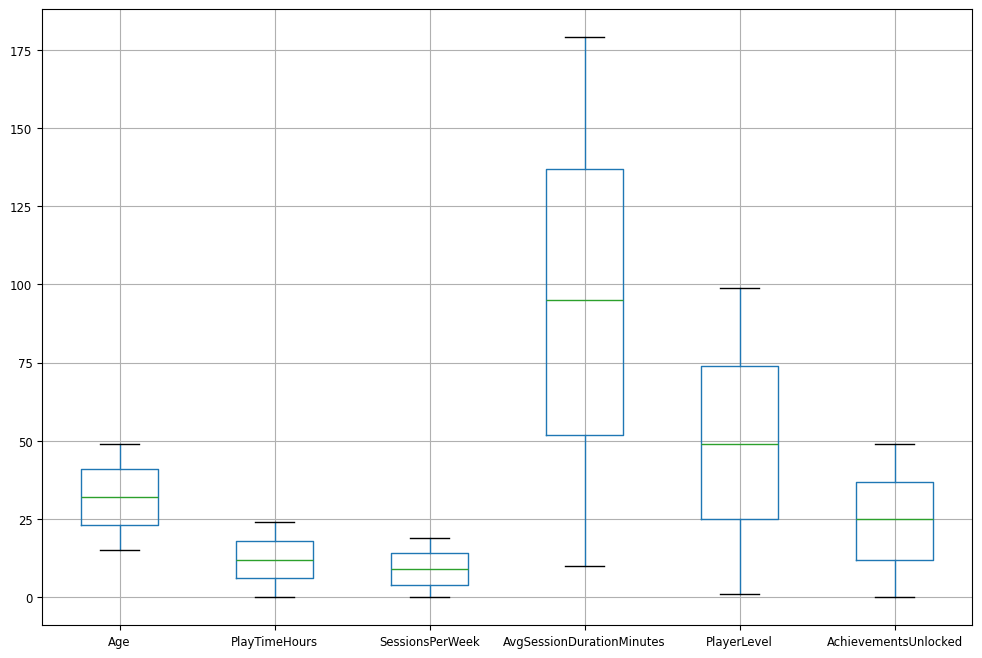

In [13]:
df_num = df.select_dtypes(include="number")
df_num.drop(columns=['PlayerID'],inplace=True)
df_num .boxplot(figsize = (12,8) , fontsize="small")


it seems this dataset was cleaned


*   there is no missing value,
*   duplicated
*   and outlier.



array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'PlayTimeHours'}>],
       [<Axes: title={'center': 'SessionsPerWeek'}>,
        <Axes: title={'center': 'AvgSessionDurationMinutes'}>],
       [<Axes: title={'center': 'PlayerLevel'}>,
        <Axes: title={'center': 'AchievementsUnlocked'}>]], dtype=object)

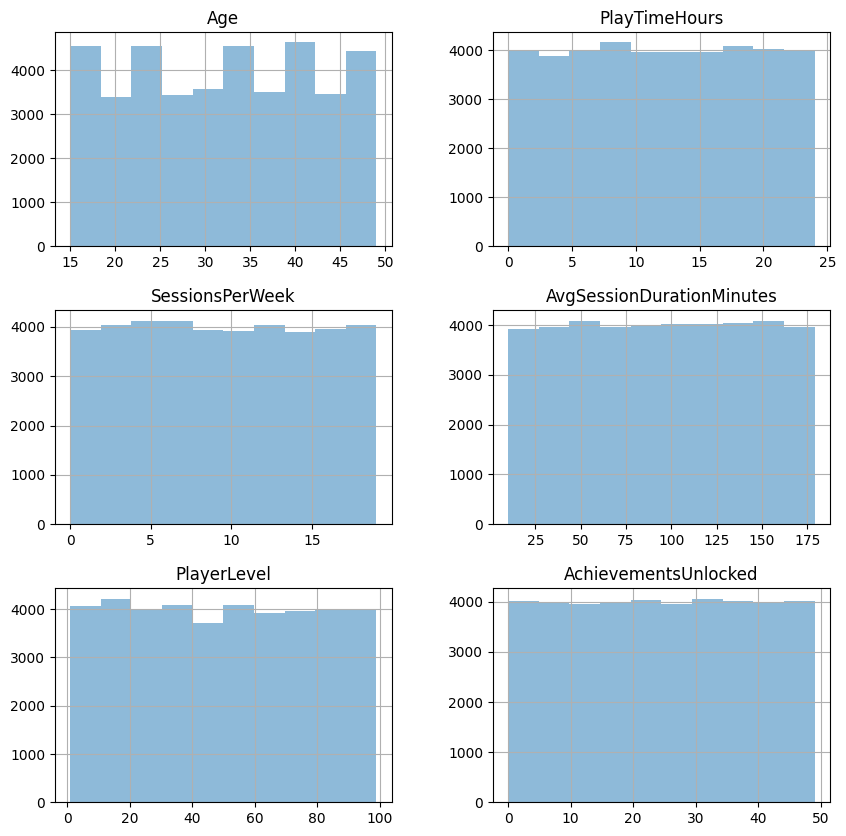

In [14]:
df_num.hist(figsize = (10,10), alpha=.5)

<Axes: ylabel='Density'>

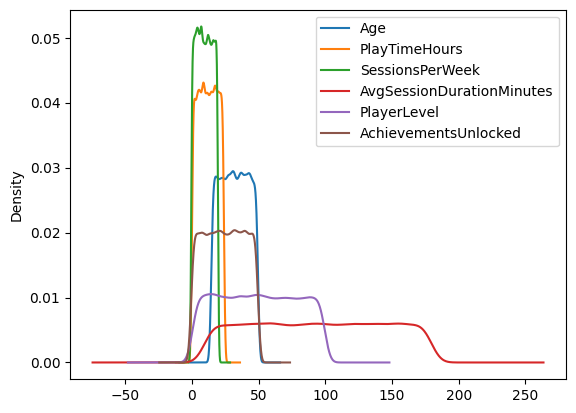

In [15]:
df_num.plot.kde()

all of numerical datas are equally distributeก:


*   this raises the hypothesis that these data are uniform distribution.




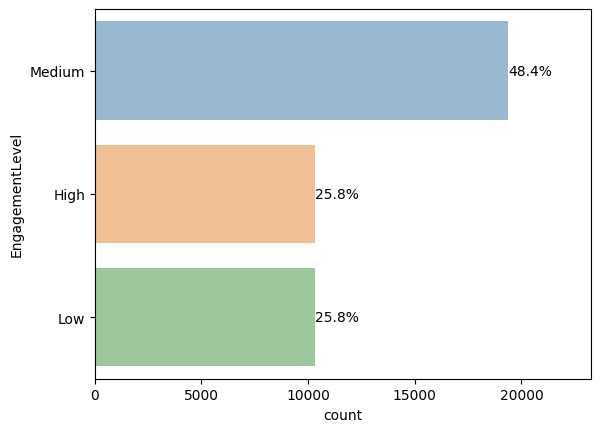

In [16]:
ax = sns.countplot(y="EngagementLevel", data = df ,hue =  "EngagementLevel" , alpha=0.5)

# get the total count the column
total = df['EngagementLevel'].count()

# annotate the bars with fmt from matplotlib v3.7.0
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

# add space at the end of the bar
ax.margins(x=0.2)


Target variable:


*   About half of EngagementLevel in the dataset are Medium.
*   The left are high and low equally.
* the Target variable doesn't seem to have imbalanced data.




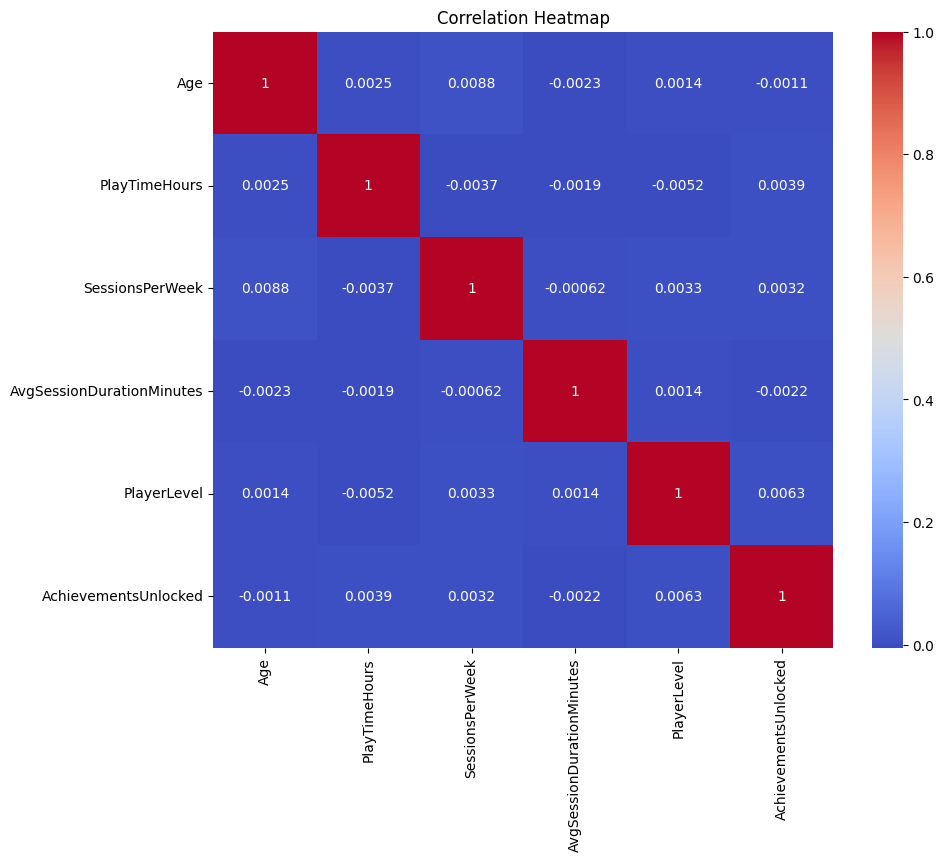

In [17]:
numeric_data = df.select_dtypes(include=['number'])
numeric_data.drop(columns=['PlayerID'], inplace = True)
correlation = numeric_data.corr()

#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

From heatmap

*   the numerical feature doesn't  have correlation between them




In [18]:
df.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

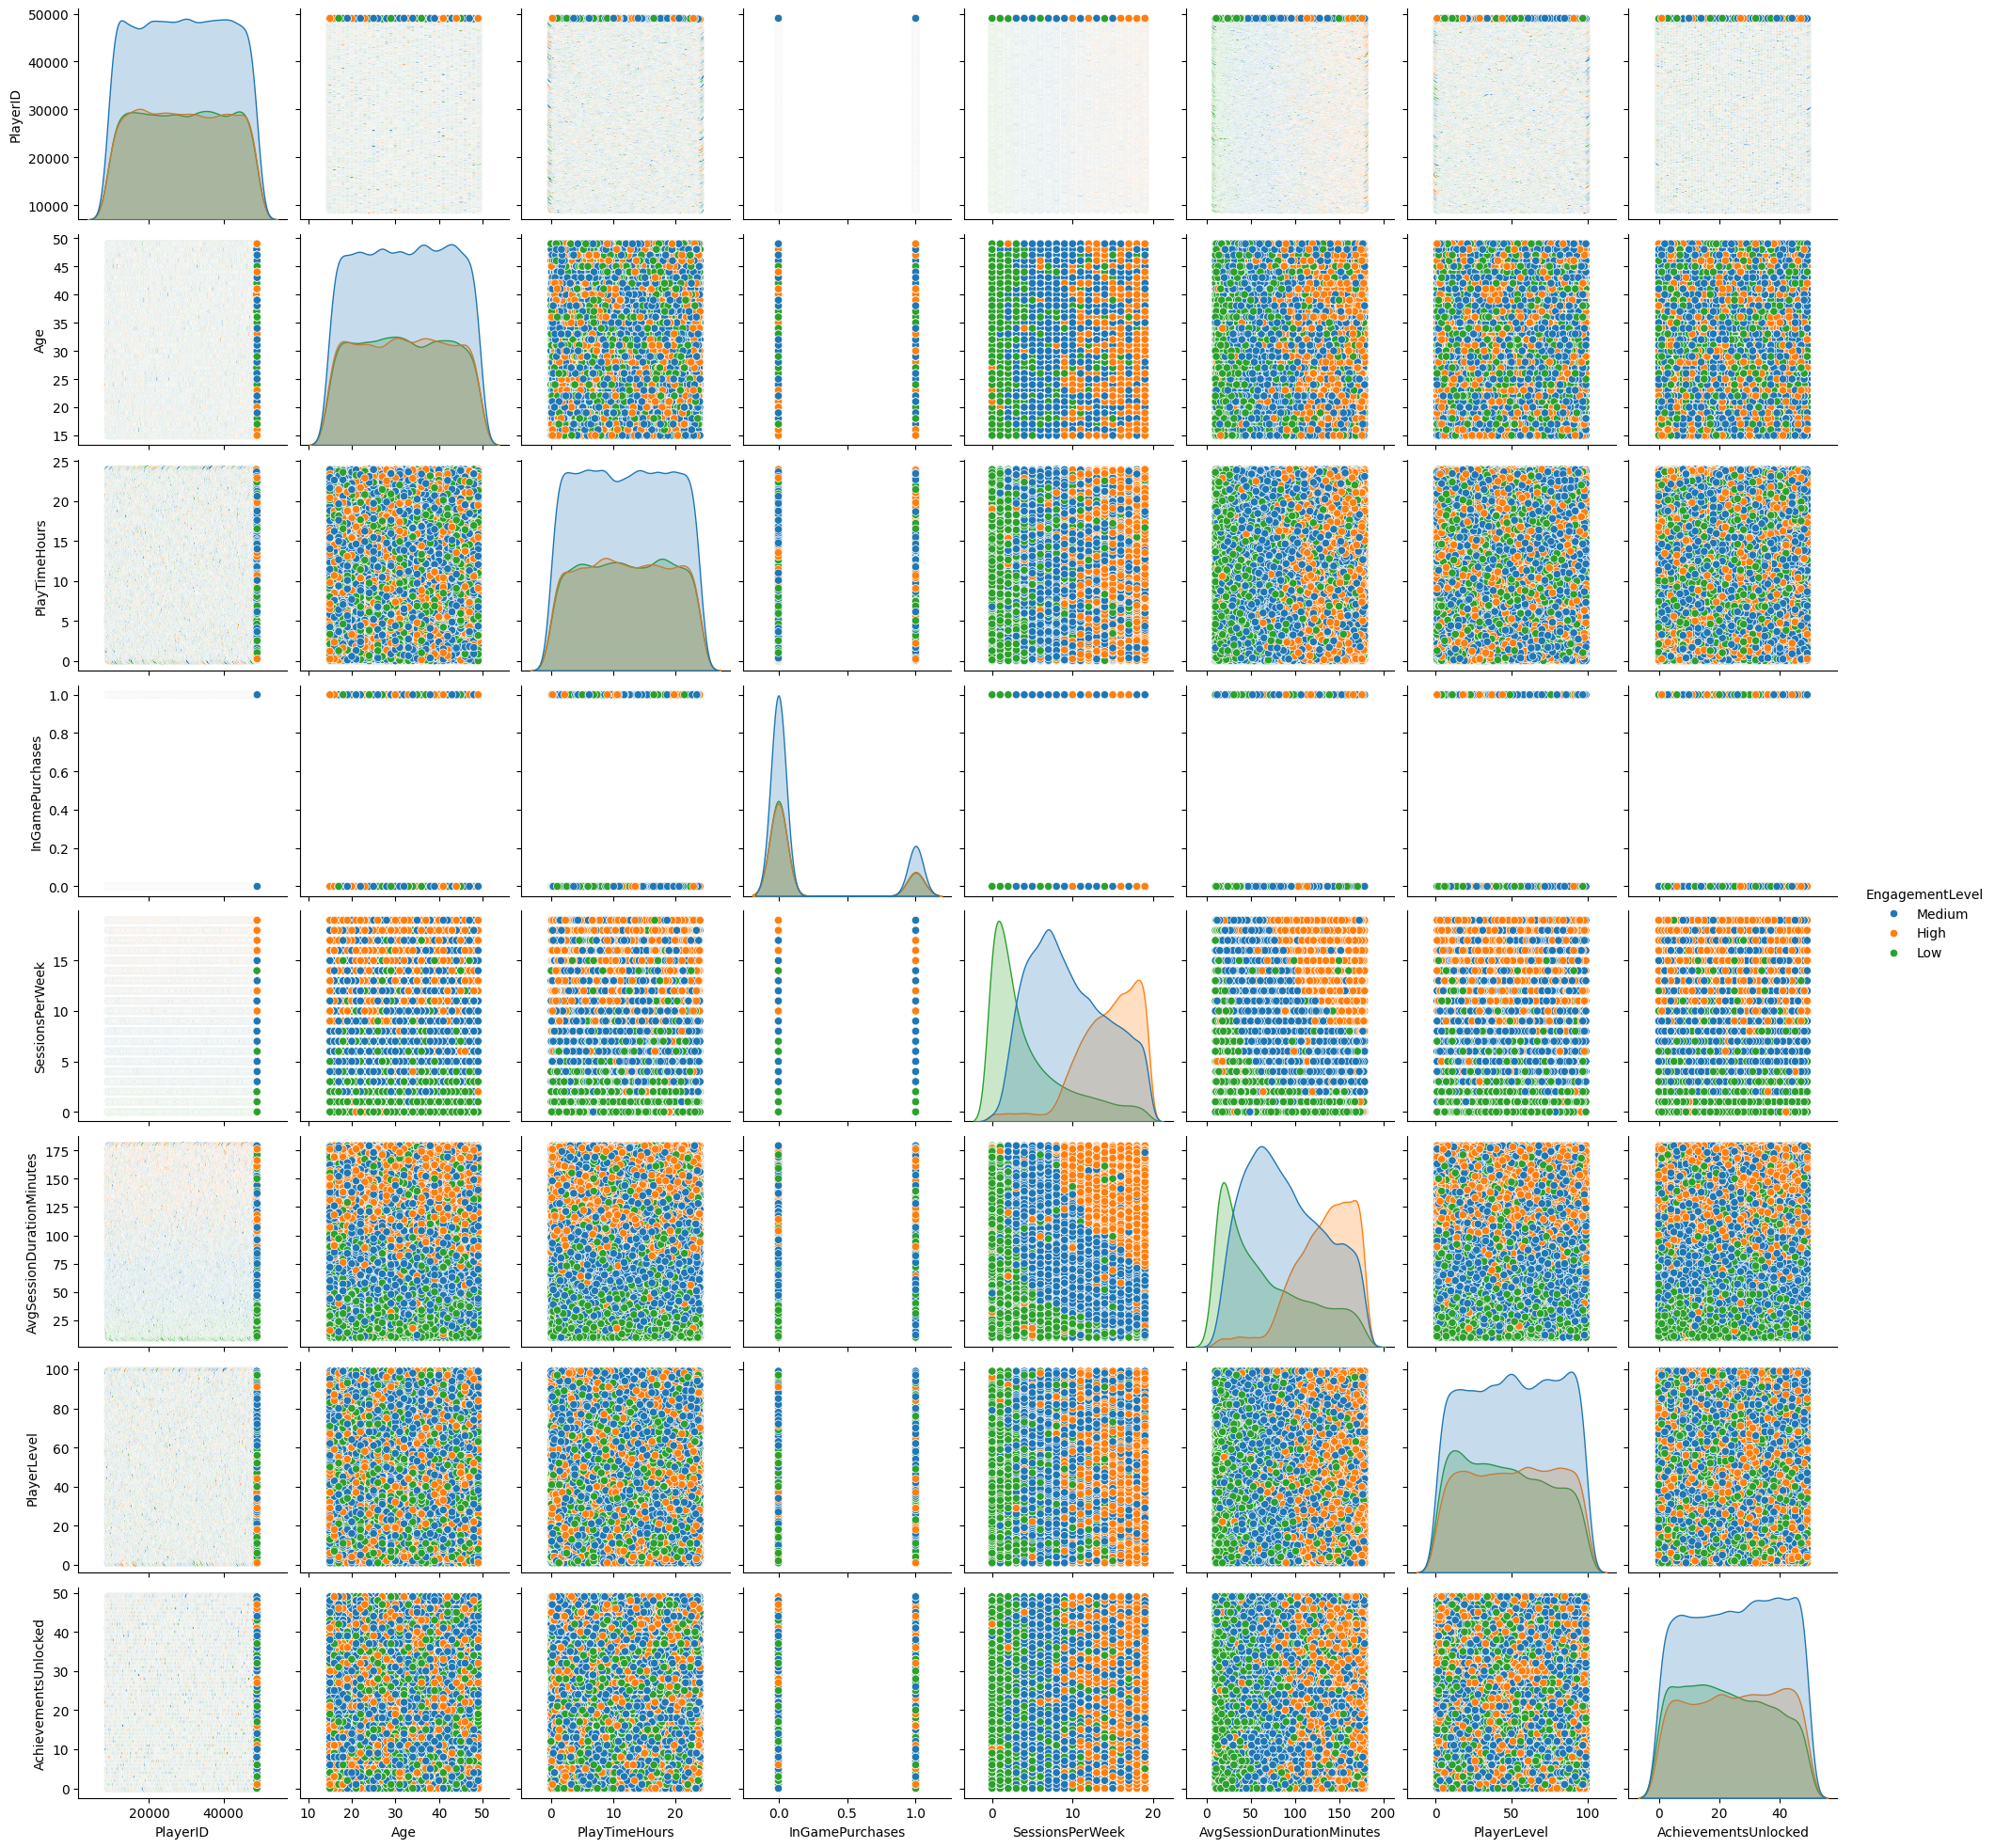

In [19]:
sns.pairplot(data = df, hue="EngagementLevel" )

From Pair plot with engagement level as hue:


*   we can see some pattern
*   With Higher SessionsPerWeek  and AvgSessionDuration might relate to higher EngagementLevel




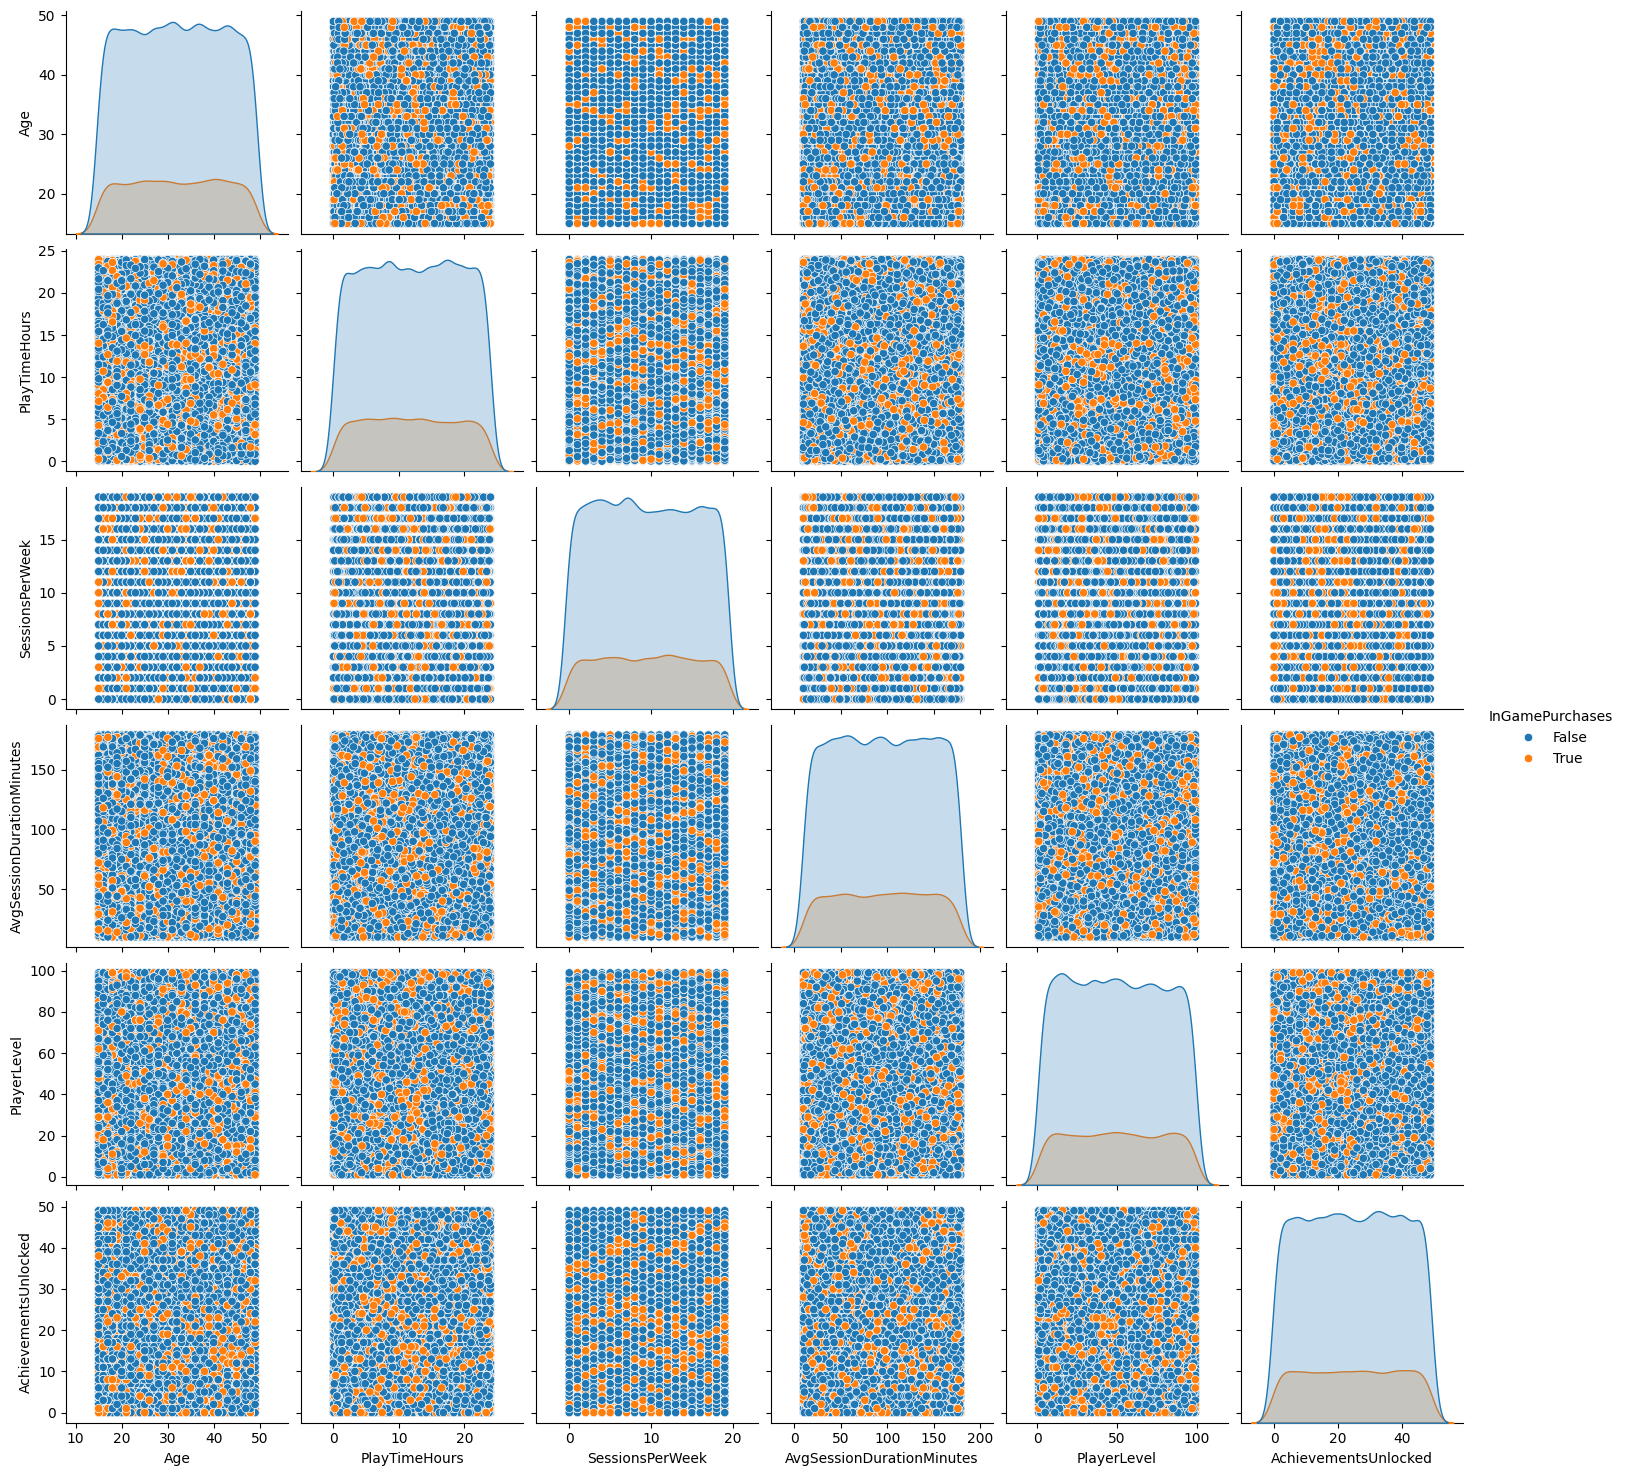

In [20]:
sns.pairplot(data =df , vars = df[['Age', 'PlayTimeHours', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       ]],
             hue="InGamePurchases" )

From Pair plot with in game purchase as hue:


*   the purchase doesn't have explicit relationship with numerical features

<Axes: xlabel='count', ylabel='GameGenre'>

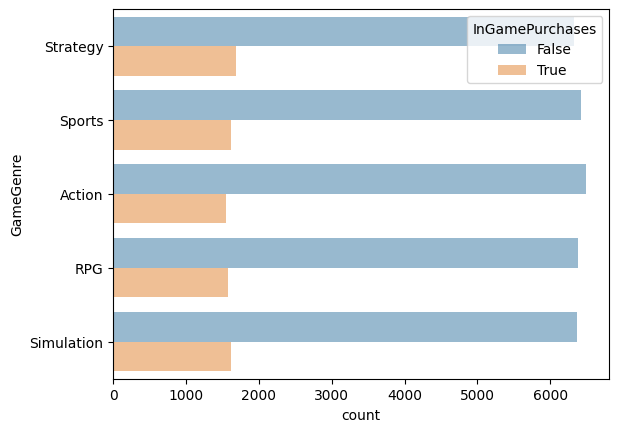

In [21]:
sns.countplot(y="GameGenre", data = df ,hue =  "InGamePurchases" , alpha=0.5)

From count plot with in game purchase as hue:


*   there is no specific genre taht makes player purchase.



In [22]:
purchase_counts = (
    df.groupby(['Location', 'InGamePurchases'])
      .size()
      .unstack()
      .reset_index()
    )
purchase_counts ["percentage"] = (purchase_counts[True] / (purchase_counts[True] + purchase_counts[False])) * 100
purchase_counts

InGamePurchases Location  False  True  percentage
0                   Asia   6435  1660   20.506485
1                 Europe   9561  2443   20.351549
2                  Other   3175   760   19.313850
3                    USA  12822  3178   19.862500

<ipython-input-23-3107869962>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Location',


Text(0, 0.5, 'Percentage of Purchases (%)')

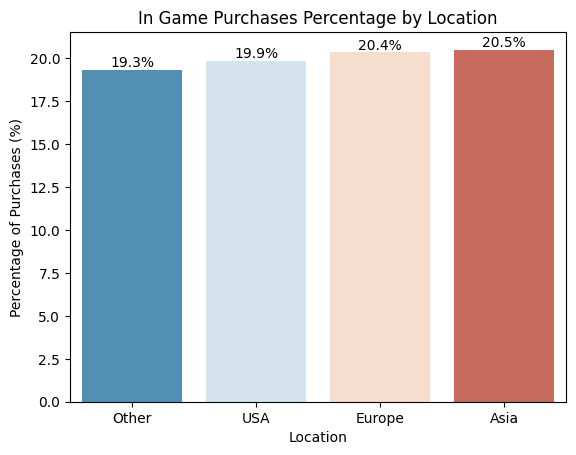

In [23]:
ax = sns.barplot(x='Location',
            y='percentage', data=purchase_counts,
            order=purchase_counts.sort_values('percentage').Location,
            palette = "RdBu_r")

for c in ax.containers:
  ax.bar_label(c, fmt= lambda x: f'{(x):0.1f}%')

plt.title('In Game Purchases Percentage by Location', fontsize=12)
plt.xlabel('Location')
plt.ylabel('Percentage of Purchases (%)')


From bar plot above:
*   each location almost
has the same percentage of purchases

# Data Preprocessing

check list:

*   drop unnecessary column
*   feature interaction

*   feature encoding

*   save data for modeling





In [25]:
df.drop(columns=['PlayerID'],inplace=True)
df

Age  Gender Location   GameGenre  PlayTimeHours  InGamePurchases  \
0       43    Male    Other    Strategy      16.271119            False   
1       29  Female      USA    Strategy       5.525961            False   
2       22  Female      USA      Sports       8.223755            False   
3       35    Male      USA      Action       5.265351             True   
4       33    Male   Europe      Action      15.531945            False   
...    ...     ...      ...         ...            ...              ...   
40029   32    Male      USA    Strategy      20.619662            False   
40030   44  Female    Other  Simulation      13.539280            False   
40031   15  Female      USA         RPG       0.240057             True   
40032   34    Male      USA      Sports      14.017818             True   
40033   19    Male      USA      Sports      10.083804            False   

      GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0             Medium                6                        108           79   
1             Medium                5                        144           11   
2               Easy               16                        142           35   
3               Easy                9                         85           57   
4             Medium                2                        131           95   
...              ...              ...                        ...          ...   
40029           Easy                4                         75           85   
40030           Hard               19                        114           71   
40031           Easy               10                        176           29   
40032         Medium                3                        128           70   
40033           Easy               13                         84           72   

       AchievementsUnlocked EngagementLevel  
0                        25          Medium  
1                        10          Medium  
2                        41            High  
3                        47          Medium  
4                        37          Medium  
...                     ...             ...  
40029                    14          Medium  
40030                    27            High  
40031                     1            High  
40032                    10          Medium  
40033                    39          Medium  

[40034 rows x 12 columns]

I decide to create AvgSessionMinutePerWeek due to the pattern found in the piar plot earlier.

In [26]:
df["AvgMinutePerWeek "] = df["AvgSessionDurationMinutes"] * df["SessionsPerWeek"]
df

Age  Gender Location   GameGenre  PlayTimeHours  InGamePurchases  \
0       43    Male    Other    Strategy      16.271119            False   
1       29  Female      USA    Strategy       5.525961            False   
2       22  Female      USA      Sports       8.223755            False   
3       35    Male      USA      Action       5.265351             True   
4       33    Male   Europe      Action      15.531945            False   
...    ...     ...      ...         ...            ...              ...   
40029   32    Male      USA    Strategy      20.619662            False   
40030   44  Female    Other  Simulation      13.539280            False   
40031   15  Female      USA         RPG       0.240057             True   
40032   34    Male      USA      Sports      14.017818             True   
40033   19    Male      USA      Sports      10.083804            False   

      GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0             Medium                6                        108           79   
1             Medium                5                        144           11   
2               Easy               16                        142           35   
3               Easy                9                         85           57   
4             Medium                2                        131           95   
...              ...              ...                        ...          ...   
40029           Easy                4                         75           85   
40030           Hard               19                        114           71   
40031           Easy               10                        176           29   
40032         Medium                3                        128           70   
40033           Easy               13                         84           72   

       AchievementsUnlocked EngagementLevel  AvgMinutePerWeek   
0                        25          Medium                648  
1                        10          Medium                720  
2                        41            High               2272  
3                        47          Medium                765  
4                        37          Medium                262  
...                     ...             ...                ...  
40029                    14          Medium                300  
40030                    27            High               2166  
40031                     1            High               1760  
40032                    10          Medium                384  
40033                    39          Medium               1092  

[40034 rows x 13 columns]

next is encoding the category features.

In [32]:
cate = df.select_dtypes(include="object").columns
cate

Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel'], dtype='object')

In [33]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')
df

Age Location   GameGenre  PlayTimeHours  InGamePurchases  \
0       43    Other    Strategy      16.271119            False   
1       29      USA    Strategy       5.525961            False   
2       22      USA      Sports       8.223755            False   
3       35      USA      Action       5.265351             True   
4       33   Europe      Action      15.531945            False   
...    ...      ...         ...            ...              ...   
40029   32      USA    Strategy      20.619662            False   
40030   44    Other  Simulation      13.539280            False   
40031   15      USA         RPG       0.240057             True   
40032   34      USA      Sports      14.017818             True   
40033   19      USA      Sports      10.083804            False   

      GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0             Medium                6                        108           79   
1             Medium                5                        144           11   
2               Easy               16                        142           35   
3               Easy                9                         85           57   
4             Medium                2                        131           95   
...              ...              ...                        ...          ...   
40029           Easy                4                         75           85   
40030           Hard               19                        114           71   
40031           Easy               10                        176           29   
40032         Medium                3                        128           70   
40033           Easy               13                         84           72   

       AchievementsUnlocked EngagementLevel  AvgMinutePerWeek   Gender_Female  \
0                        25          Medium                648          False   
1                        10          Medium                720           True   
2                        41            High               2272           True   
3                        47          Medium                765          False   
4                        37          Medium                262          False   
...                     ...             ...                ...            ...   
40029                    14          Medium                300          False   
40030                    27            High               2166           True   
40031                     1            High               1760           True   
40032                    10          Medium                384          False   
40033                    39          Medium               1092          False   

       Gender_Male  
0             True  
1            False  
2            False  
3             True  
4             True  
...            ...  
40029         True  
40030        False  
40031        False  
40032         True  
40033         True  

[40034 rows x 14 columns]

In [36]:
df.drop(columns=['Gender_Male'],inplace=True)
df

Age   GameGenre  PlayTimeHours  InGamePurchases GameDifficulty  \
0       43    Strategy      16.271119            False         Medium   
1       29    Strategy       5.525961            False         Medium   
2       22      Sports       8.223755            False           Easy   
3       35      Action       5.265351             True           Easy   
4       33      Action      15.531945            False         Medium   
...    ...         ...            ...              ...            ...   
40029   32    Strategy      20.619662            False           Easy   
40030   44  Simulation      13.539280            False           Hard   
40031   15         RPG       0.240057             True           Easy   
40032   34      Sports      14.017818             True         Medium   
40033   19      Sports      10.083804            False           Easy   

       SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0                    6                        108           79   
1                    5                        144           11   
2                   16                        142           35   
3                    9                         85           57   
4                    2                        131           95   
...                ...                        ...          ...   
40029                4                         75           85   
40030               19                        114           71   
40031               10                        176           29   
40032                3                        128           70   
40033               13                         84           72   

       AchievementsUnlocked EngagementLevel  AvgMinutePerWeek   Gender_Female  \
0                        25          Medium                648          False   
1                        10          Medium                720           True   
2                        41            High               2272           True   
3                        47          Medium                765          False   
4                        37          Medium                262          False   
...                     ...             ...                ...            ...   
40029                    14          Medium                300          False   
40030                    27            High               2166           True   
40031                     1            High               1760           True   
40032                    10          Medium                384          False   
40033                    39          Medium               1092          False   

       Location_Asia  Location_Europe  Location_Other  Location_USA  
0              False            False            True         False  
1              False            False           False          True  
2              False            False           False          True  
3              False            False           False          True  
4              False             True           False         False  
...              ...              ...             ...           ...  
40029          False            False           False          True  
40030          False            False            True         False  
40031          False            False           False          True  
40032          False            False           False          True  
40033          False            False           False          True  

[40034 rows x 16 columns]

In [34]:
df = pd.get_dummies(df, columns=['Location'])

In [35]:
df

Age   GameGenre  PlayTimeHours  InGamePurchases GameDifficulty  \
0       43    Strategy      16.271119            False         Medium   
1       29    Strategy       5.525961            False         Medium   
2       22      Sports       8.223755            False           Easy   
3       35      Action       5.265351             True           Easy   
4       33      Action      15.531945            False         Medium   
...    ...         ...            ...              ...            ...   
40029   32    Strategy      20.619662            False           Easy   
40030   44  Simulation      13.539280            False           Hard   
40031   15         RPG       0.240057             True           Easy   
40032   34      Sports      14.017818             True         Medium   
40033   19      Sports      10.083804            False           Easy   

       SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0                    6                        108           79   
1                    5                        144           11   
2                   16                        142           35   
3                    9                         85           57   
4                    2                        131           95   
...                ...                        ...          ...   
40029                4                         75           85   
40030               19                        114           71   
40031               10                        176           29   
40032                3                        128           70   
40033               13                         84           72   

       AchievementsUnlocked EngagementLevel  AvgMinutePerWeek   Gender_Female  \
0                        25          Medium                648          False   
1                        10          Medium                720           True   
2                        41            High               2272           True   
3                        47          Medium                765          False   
4                        37          Medium                262          False   
...                     ...             ...                ...            ...   
40029                    14          Medium                300          False   
40030                    27            High               2166           True   
40031                     1            High               1760           True   
40032                    10          Medium                384          False   
40033                    39          Medium               1092          False   

       Gender_Male  Location_Asia  Location_Europe  Location_Other  \
0             True          False            False            True   
1            False          False            False           False   
2            False          False            False           False   
3             True          False            False           False   
4             True          False             True           False   
...            ...            ...              ...             ...   
40029         True          False            False           False   
40030        False          False            False            True   
40031        False          False            False           False   
40032         True          False            False           False   
40033         True          False            False           False   

       Location_USA  
0             False  
1              True  
2              True  
3              True  
4             False  
...             ...  
40029          True  
40030         False  
40031          True  
40032          True  
40033          True  

[40034 rows x 17 columns]

In [38]:
df = pd.get_dummies(df,columns=["GameGenre"])
df

Age  PlayTimeHours  InGamePurchases GameDifficulty  SessionsPerWeek  \
0       43      16.271119            False         Medium                6   
1       29       5.525961            False         Medium                5   
2       22       8.223755            False           Easy               16   
3       35       5.265351             True           Easy                9   
4       33      15.531945            False         Medium                2   
...    ...            ...              ...            ...              ...   
40029   32      20.619662            False           Easy                4   
40030   44      13.539280            False           Hard               19   
40031   15       0.240057             True           Easy               10   
40032   34      14.017818             True         Medium                3   
40033   19      10.083804            False           Easy               13   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                            108           79                    25   
1                            144           11                    10   
2                            142           35                    41   
3                             85           57                    47   
4                            131           95                    37   
...                          ...          ...                   ...   
40029                         75           85                    14   
40030                        114           71                    27   
40031                        176           29                     1   
40032                        128           70                    10   
40033                         84           72                    39   

      EngagementLevel  AvgMinutePerWeek   Gender_Female  Location_Asia  \
0              Medium                648          False          False   
1              Medium                720           True          False   
2                High               2272           True          False   
3              Medium                765          False          False   
4              Medium                262          False          False   
...               ...                ...            ...            ...   
40029          Medium                300          False          False   
40030            High               2166           True          False   
40031            High               1760           True          False   
40032          Medium                384          False          False   
40033          Medium               1092          False          False   

       Location_Europe  Location_Other  Location_USA  GameGenre_Action  \
0                False            True         False             False   
1                False           False          True             False   
2                False           False          True             False   
3                False           False          True              True   
4                 True           False         False              True   
...                ...             ...           ...               ...   
40029            False           False          True             False   
40030            False            True         False             False   
40031            False           False          True             False   
40032            False           False          True             False   
40033            False           False          True             False   

       GameGenre_RPG  GameGenre_Simulation  GameGenre_Sports  \
0              False                 False             False   
1              False                 False             False   
2              False                 False              True   
3              False                 False             False   
4              False                 False             False   
...              ...                   ...             

In [40]:
df["GameDifficulty"].unique()

array(['Medium', 'Easy', 'Hard'], dtype=object)

In [41]:
#Ordinal Encode
map = {'Medium' :1 , 'Easy': 0, 'Hard':3 }
df["GameDifficulty"] = df["GameDifficulty"].map(map)
df

Age  PlayTimeHours  InGamePurchases  GameDifficulty  SessionsPerWeek  \
0       43      16.271119            False               1                6   
1       29       5.525961            False               1                5   
2       22       8.223755            False               0               16   
3       35       5.265351             True               0                9   
4       33      15.531945            False               1                2   
...    ...            ...              ...             ...              ...   
40029   32      20.619662            False               0                4   
40030   44      13.539280            False               3               19   
40031   15       0.240057             True               0               10   
40032   34      14.017818             True               1                3   
40033   19      10.083804            False               0               13   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                            108           79                    25   
1                            144           11                    10   
2                            142           35                    41   
3                             85           57                    47   
4                            131           95                    37   
...                          ...          ...                   ...   
40029                         75           85                    14   
40030                        114           71                    27   
40031                        176           29                     1   
40032                        128           70                    10   
40033                         84           72                    39   

      EngagementLevel  AvgMinutePerWeek   Gender_Female  Location_Asia  \
0              Medium                648          False          False   
1              Medium                720           True          False   
2                High               2272           True          False   
3              Medium                765          False          False   
4              Medium                262          False          False   
...               ...                ...            ...            ...   
40029          Medium                300          False          False   
40030            High               2166           True          False   
40031            High               1760           True          False   
40032          Medium                384          False          False   
40033          Medium               1092          False          False   

       Location_Europe  Location_Other  Location_USA  GameGenre_Action  \
0                False            True         False             False   
1                False           False          True             False   
2                False           False          True             False   
3                False           False          True              True   
4                 True           False         False              True   
...                ...             ...           ...               ...   
40029            False           False          True             False   
40030            False            True         False             False   
40031            False           False          True             False   
40032            False           False          True             False   
40033            False           False          True             False   

       GameGenre_RPG  GameGenre_Simulation  GameGenre_Sports  \
0              False                 False             False   
1              False                 False             False   
2              False                 False              True   
3              False                 False             False   
4              False                 False             False   
...              ...                   ... 

In [42]:
df["EngagementLevel"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [43]:
#Ordinal Encode
map = {'Medium' :1 , 'Low': 0, 'High':3 }
df["EngagementLevel"] = df["EngagementLevel"].map(map)
df

Age  PlayTimeHours  InGamePurchases  GameDifficulty  SessionsPerWeek  \
0       43      16.271119            False               1                6   
1       29       5.525961            False               1                5   
2       22       8.223755            False               0               16   
3       35       5.265351             True               0                9   
4       33      15.531945            False               1                2   
...    ...            ...              ...             ...              ...   
40029   32      20.619662            False               0                4   
40030   44      13.539280            False               3               19   
40031   15       0.240057             True               0               10   
40032   34      14.017818             True               1                3   
40033   19      10.083804            False               0               13   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                            108           79                    25   
1                            144           11                    10   
2                            142           35                    41   
3                             85           57                    47   
4                            131           95                    37   
...                          ...          ...                   ...   
40029                         75           85                    14   
40030                        114           71                    27   
40031                        176           29                     1   
40032                        128           70                    10   
40033                         84           72                    39   

       EngagementLevel  AvgMinutePerWeek   Gender_Female  Location_Asia  \
0                    1                648          False          False   
1                    1                720           True          False   
2                    3               2272           True          False   
3                    1                765          False          False   
4                    1                262          False          False   
...                ...                ...            ...            ...   
40029                1                300          False          False   
40030                3               2166           True          False   
40031                3               1760           True          False   
40032                1                384          False          False   
40033                1               1092          False          False   

       Location_Europe  Location_Other  Location_USA  GameGenre_Action  \
0                False            True         False             False   
1                False           False          True             False   
2                False           False          True             False   
3                False           False          True              True   
4                 True           False         False              True   
...                ...             ...           ...               ...   
40029            False           False          True             False   
40030            False            True         False             False   
40031            False           False          True             False   
40032            False           False          True             False   
40033            False           False          True             False   

       GameGenre_RPG  GameGenre_Simulation  GameGenre_Sports  \
0              False                 False             False   
1              False                 False             False   
2              False                 False              True   
3              False                 False             False   
4              False                 False             False   
...              ...           

In [45]:
df.to_csv('online_gaming_behavior_cleaned.csv')

# Modeling

Check point:


*   define feature matrix and target vector


*   split train and test data

*   normalize feature
*   choose model


*   train and Evaluate




In [46]:
df = pd.read_csv("/content/drive/MyDrive/I gonna get Data science Job/Game/online_gaming_behavior_cleaned.csv")

In [47]:
df

Unnamed: 0  Age  PlayTimeHours  InGamePurchases  GameDifficulty  \
0               0   43      16.271119            False               1   
1               1   29       5.525961            False               1   
2               2   22       8.223755            False               0   
3               3   35       5.265351             True               0   
4               4   33      15.531945            False               1   
...           ...  ...            ...              ...             ...   
40029       40029   32      20.619662            False               0   
40030       40030   44      13.539280            False               3   
40031       40031   15       0.240057             True               0   
40032       40032   34      14.017818             True               1   
40033       40033   19      10.083804            False               0   

       SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0                    6                        108           79   
1                    5                        144           11   
2                   16                        142           35   
3                    9                         85           57   
4                    2                        131           95   
...                ...                        ...          ...   
40029                4                         75           85   
40030               19                        114           71   
40031               10                        176           29   
40032                3                        128           70   
40033               13                         84           72   

       AchievementsUnlocked  EngagementLevel  ...  Gender_Female  \
0                        25                1  ...          False   
1                        10                1  ...           True   
2                        41                3  ...           True   
3                        47                1  ...          False   
4                        37                1  ...          False   
...                     ...              ...  ...            ...   
40029                    14                1  ...          False   
40030                    27                3  ...           True   
40031                     1                3  ...           True   
40032                    10                1  ...          False   
40033                    39                1  ...          False   

       Location_Asia  Location_Europe  Location_Other  Location_USA  \
0              False            False            True         False   
1              False            False           False          True   
2              False            False           False          True   
3              False            False           False          True   
4              False             True           False         False   
...              ...              ...             ...           ...   
40029          False            False           False          True   
40030          False            False            True         False   
40031          False            False           False          True   
40032          False            False           False          True   
40033          False            False           False          True   

       GameGenre_Action  GameGenre_RPG  GameGenre_Simulation  \
0                 False          False                 False   
1                 False          False                 False   
2                 False          False                 False   
3                  True          False                 False   
4                  True          False                 False   
...                 ...            ...                   ...   
40029             False          False                 False   
40030             False          False                  True   
40031             False           True                 False   
40032          

In [48]:
X = df.drop(columns=['EngagementLevel'])
y = df['EngagementLevel']

In [55]:
X

Unnamed: 0  Age  PlayTimeHours  InGamePurchases  GameDifficulty  \
0               0   43      16.271119            False               1   
1               1   29       5.525961            False               1   
2               2   22       8.223755            False               0   
3               3   35       5.265351             True               0   
4               4   33      15.531945            False               1   
...           ...  ...            ...              ...             ...   
40029       40029   32      20.619662            False               0   
40030       40030   44      13.539280            False               3   
40031       40031   15       0.240057             True               0   
40032       40032   34      14.017818             True               1   
40033       40033   19      10.083804            False               0   

       SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0                    6                        108           79   
1                    5                        144           11   
2                   16                        142           35   
3                    9                         85           57   
4                    2                        131           95   
...                ...                        ...          ...   
40029                4                         75           85   
40030               19                        114           71   
40031               10                        176           29   
40032                3                        128           70   
40033               13                         84           72   

       AchievementsUnlocked  AvgMinutePerWeek   Gender_Female  Location_Asia  \
0                        25                648          False          False   
1                        10                720           True          False   
2                        41               2272           True          False   
3                        47                765          False          False   
4                        37                262          False          False   
...                     ...                ...            ...            ...   
40029                    14                300          False          False   
40030                    27               2166           True          False   
40031                     1               1760           True          False   
40032                    10                384          False          False   
40033                    39               1092          False          False   

       Location_Europe  Location_Other  Location_USA  GameGenre_Action  \
0                False            True         False             False   
1                False           False          True             False   
2                False           False          True             False   
3                False           False          True              True   
4                 True           False         False              True   
...                ...             ...           ...               ...   
40029            False           False          True             False   
40030            False            True         False             False   
40031            False           False          True             False   
40032            False           False          True             False   
40033            False           False          True             False   

       GameGenre_RPG  GameGenre_Simulation  GameGenre_Sports  \
0              False                 False             False   
1              False                 False             False   
2              False                 False              True   
3              False                 False             False   
4              False                 False             False   
...              ...                   ...               ...   
40029          False       

In [56]:
y

0        1
1        1
2        3
3        1
4        1
        ..
40029    1
40030    3
40031    3
40032    1
40033    1
Name: EngagementLevel, Length: 40034, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

models = [
    ("LogReg",  LogisticRegression()),
    ("RF",      RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("GradBoost", GradientBoostingClassifier()),
    ("MLP",MLPClassifier())
]


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

results = []

for name, clf in models:

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model",  clf),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc     = accuracy_score(y_test, y_pred)
    cv_mean = cross_val_score(pipe, X, y, cv=5, scoring="accuracy")

    results.append((name, acc, cv_mean))

    print(f"──────────── {name} ────────────")
    print(f"Hold‑out accuracy : {acc:0.3f}")
    print(f"CV accuracy (5‑fold): {cv_mean}")
    print(classification_report(y_test, y_pred, zero_division=0))


──────────── LogReg ────────────
Hold‑out accuracy : 0.872
CV accuracy (5‑fold): [0.86886474 0.87985513 0.86836518 0.87148745 0.86610042]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2093
           1       0.86      0.92      0.89      3879
           3       0.93      0.84      0.88      2035

    accuracy                           0.87      8007
   macro avg       0.88      0.86      0.87      8007
weighted avg       0.87      0.87      0.87      8007

──────────── RF ────────────
Hold‑out accuracy : 0.918
CV accuracy (5‑fold): [0.88884726 0.9233171  0.92044461 0.92494068 0.75630777]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2093
           1       0.92      0.95      0.93      3879
           3       0.93      0.89      0.90      2035

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.

After training i spotted 3 models to discuss  :

1.   Random Forest
* accuracy : 0.918.
* CV : [0.88884726 0.9233171  0.92044461 0.92494068 0.75630777].
*   this model give the 2nd best accuracy.
*   still have some of variance which range 0.75-0.88.


3.   Gradient Boosting
* accuracy :  0.922.
* CV : [0.60759336 0.92843762 0.92144374 0.92606469 0.28666  ].
*   this model give the best accuracy.
*   but have a high variance which range 0.28-0.922 ,this suggests that the model might be overfitting.

4.   MLP
*   accuracy : 0.907.
*   CV : [0.90720619 0.91270139 0.91107781 0.91082803 0.89607794].
*   this model give the 3rd best accuracy.
*   but still have low variance 0.89-0.91.i think this is the best generalized model.

So i choose to tune random forest and MLP .










# Hyperparameter Tuning

Check point:

*   select feature by feature importance


*   use GridSearchCV for tuning


*   evaluate




In [93]:
for i in range(1,4) :
  print(models[i][0], "importance: \n",
        models[i][1].feature_importances_)
  print("______________________________________________________\n")

RF importance: 
 [0.03265668 0.02475046 0.03262332 0.00409335 0.00772419 0.17867793
 0.12019039 0.03916231 0.03744938 0.48637793 0.00492672 0.00346956
 0.00396325 0.00259723 0.00403991 0.00362126 0.00347032 0.00337902
 0.00340803 0.00341876]
______________________________________________________

AdaBoost importance: 
 [0.         0.         0.         0.         0.         0.
 0.         0.01720779 0.01830264 0.96448957 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
______________________________________________________

GradBoost importance: 
 [1.24911471e-03 2.95123737e-04 9.87587105e-04 9.99382274e-06
 8.26071416e-05 1.14711815e-04 2.97540203e-04 2.19832007e-02
 2.74958321e-02 9.47391844e-01 0.00000000e+00 0.00000000e+00
 1.02996411e-05 0.00000000e+00 5.47785913e-06 2.02207483e-05
 1.14010121e-05 2.71071011e-05 1.79275093e-05 1.05334728e-08]
______________________________________________________



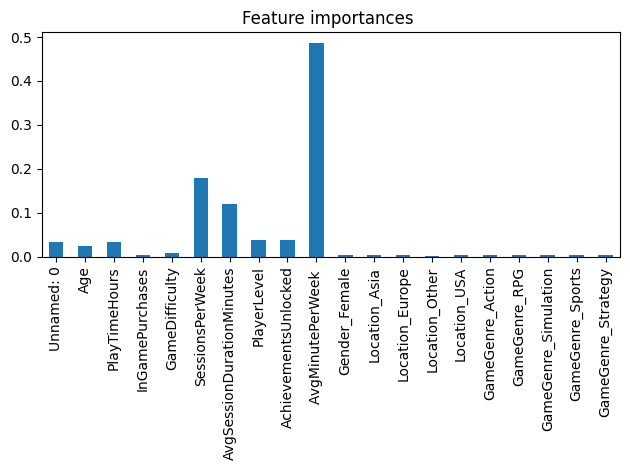

In [102]:
forest = models[1][1]
feature_names = X.columns
importances = forest.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar( )
ax.set_title("Feature importances ")
fig.tight_layout()

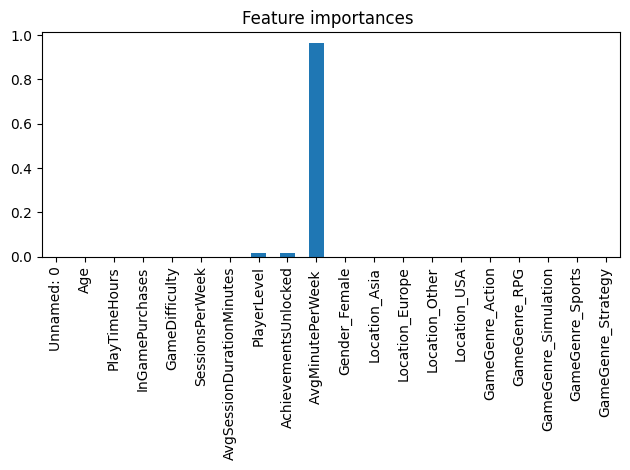

In [103]:
Ada = models[2][1]
feature_names = X.columns
importances = Ada.feature_importances_

Ada_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
Ada_importances.plot.bar( )
ax.set_title("Feature importances ")
fig.tight_layout()

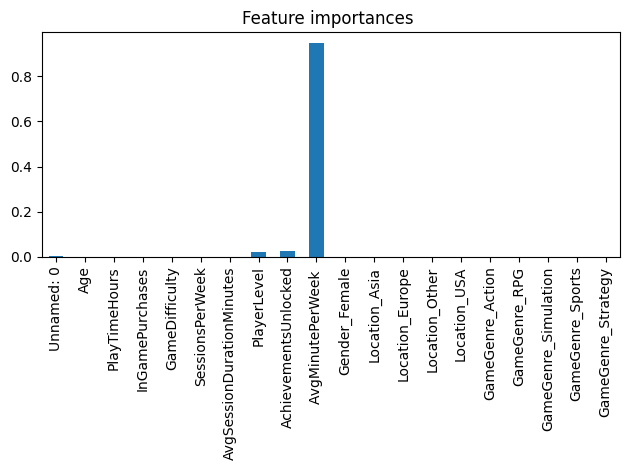

In [104]:
Grad = models[3][1]
feature_names = X.columns
importances = Grad .feature_importances_

Grad_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
Grad_importances.plot.bar( )
ax.set_title("Feature importances ")
fig.tight_layout()

After plotting feature importance of Random forest, AdaBoost and GradientBoost , i decide to drop some of the columns

In [107]:
df_ft = df.copy()

In [108]:
df_ft

Unnamed: 0  Age  PlayTimeHours  InGamePurchases  GameDifficulty  \
0               0   43      16.271119            False               1   
1               1   29       5.525961            False               1   
2               2   22       8.223755            False               0   
3               3   35       5.265351             True               0   
4               4   33      15.531945            False               1   
...           ...  ...            ...              ...             ...   
40029       40029   32      20.619662            False               0   
40030       40030   44      13.539280            False               3   
40031       40031   15       0.240057             True               0   
40032       40032   34      14.017818             True               1   
40033       40033   19      10.083804            False               0   

       SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0                    6                        108           79   
1                    5                        144           11   
2                   16                        142           35   
3                    9                         85           57   
4                    2                        131           95   
...                ...                        ...          ...   
40029                4                         75           85   
40030               19                        114           71   
40031               10                        176           29   
40032                3                        128           70   
40033               13                         84           72   

       AchievementsUnlocked  EngagementLevel  ...  Gender_Female  \
0                        25                1  ...          False   
1                        10                1  ...           True   
2                        41                3  ...           True   
3                        47                1  ...          False   
4                        37                1  ...          False   
...                     ...              ...  ...            ...   
40029                    14                1  ...          False   
40030                    27                3  ...           True   
40031                     1                3  ...           True   
40032                    10                1  ...          False   
40033                    39                1  ...          False   

       Location_Asia  Location_Europe  Location_Other  Location_USA  \
0              False            False            True         False   
1              False            False           False          True   
2              False            False           False          True   
3              False            False           False          True   
4              False             True           False         False   
...              ...              ...             ...           ...   
40029          False            False           False          True   
40030          False            False            True         False   
40031          False            False           False          True   
40032          False            False           False          True   
40033          False            False           False          True   

       GameGenre_Action  GameGenre_RPG  GameGenre_Simulation  \
0                 False          False                 False   
1                 False          False                 False   
2                 False          False                 False   
3                  True          False                 False   
4                  True          False                 False   
...                 ...            ...                   ...   
40029             False          False                 False   
40030             False          False                  True   
40031             False           True                 False   
40032          

In [110]:
drop_features = [ 'Unnamed: 0',
    "Gender_Female",
    "Location_Asia",
    "Location_Europe",
    "Location_Other",
    "Location_USA",
    "GameGenre_Action",
    "GameGenre_RPG",
    "GameGenre_Simulation",
    "GameGenre_Sports",
    "GameGenre_Strategy"
]

df_ft.drop(columns = drop_features , inplace = True)

In [111]:
df_ft

Age  PlayTimeHours  InGamePurchases  GameDifficulty  SessionsPerWeek  \
0       43      16.271119            False               1                6   
1       29       5.525961            False               1                5   
2       22       8.223755            False               0               16   
3       35       5.265351             True               0                9   
4       33      15.531945            False               1                2   
...    ...            ...              ...             ...              ...   
40029   32      20.619662            False               0                4   
40030   44      13.539280            False               3               19   
40031   15       0.240057             True               0               10   
40032   34      14.017818             True               1                3   
40033   19      10.083804            False               0               13   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                            108           79                    25   
1                            144           11                    10   
2                            142           35                    41   
3                             85           57                    47   
4                            131           95                    37   
...                          ...          ...                   ...   
40029                         75           85                    14   
40030                        114           71                    27   
40031                        176           29                     1   
40032                        128           70                    10   
40033                         84           72                    39   

       EngagementLevel  AvgMinutePerWeek   
0                    1                648  
1                    1                720  
2                    3               2272  
3                    1                765  
4                    1                262  
...                ...                ...  
40029                1                300  
40030                3               2166  
40031                3               1760  
40032                1                384  
40033                1               1092  

[40034 rows x 10 columns]

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model",  RandomForestClassifier()),
    ])

param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(pipe, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best RF params:", grid_rf.best_params_)
print("Best RF CV score:", grid_rf.best_score_)

Best RF params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best RF CV score: 0.9207854170672839


In [120]:
y_pred = grid_rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2093
           1       0.92      0.95      0.93      3879
           3       0.93      0.89      0.91      2035

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



In [122]:
pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model",  MLPClassifier()),
    ])

parameters = {'model__learning_rate_init': [0.001, 0.01],
              'model__max_iter': [200,500,1000 ],
              'model__hidden_layer_sizes': [(100,), (64, 64)]}

grid_mlp = GridSearchCV(pipe, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("Best MLP params:", grid_mlp.best_params_)
print("Best MLP CV score:", grid_mlp.best_score_)

Best MLP params: {'model__hidden_layer_sizes': (100,), 'model__learning_rate_init': 0.01, 'model__max_iter': 200}
Best MLP CV score: 0.9095447598282543


In [123]:
y_pred = grid_mlp.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2093
           1       0.91      0.95      0.93      3879
           3       0.91      0.89      0.90      2035

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007

